In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 22.4 MB/s eta 0:00:00


In [ ]:
pip install -U pysal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.2/220.

In [ ]:
pip install pykrige

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 852.6/852.6 kB 31.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import requests
import json
import pysal.lib
from pysal.explore import esda
import libpysal as lps
import geopandas as gpd
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import os 
from google.colab import drive
import glob
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from pykrige.ok import OrdinaryKriging

/usr/local/lib/python3.10/dist-packages/spaghetti/network.py:39: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(f"{dep_msg}", FutureWarning)


In [ ]:
pd.set_option("display.float_format", lambda x: "%.2f" % x)
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


Sales Data 

In [ ]:
NYC_OPEN_DATA_API_KEY = '1mdrg3dpip0d9mabvpt69mo0d'
endpoint = 'https://data.cityofnewyork.us/resource/usep-8jbt.json?$limit=100000'
headers={'ym1kxdEC8e3Xowsi5RyNg9tw5': NYC_OPEN_DATA_API_KEY}
result = requests.get(endpoint, headers=headers)
data = json.loads(result.content)
sales = pd.DataFrame(data)

In [ ]:
sales.shape

(97202, 20)

In [ ]:
sales.columns

Index(['borough', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'block', 'lot', 'building_class_at_present',
       'address', 'zip_code', 'residential_units', 'commercial_units',
       'total_units', 'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of', 'sale_price',
       'sale_date', 'apartment_number'],
      dtype='object')

In [ ]:
min_date = sales['sale_date'].min()
max_date = sales['sale_date'].max()

# Print the results
print("Minimum date:", min_date)
print("Maximum date:", max_date)

Minimum date: 2021-03-01T00:00:00.000
Maximum date: 2022-02-28T00:00:00.000


Loading different Data source for additional dates: 


In [ ]:

def load_excel(filepath):
    # Read data from Excel file
    xlsx_data = pd.read_excel(filepath)
    
    # Drop the first 5 rows as headers
    xlsx_data.drop(xlsx_data.index[:5], inplace=True)
    
    # Set the column names to the values in the sixth row
    xlsx_data.columns = xlsx_data.iloc[0]
    
    # Drop the fourth row (assumes it is the redundant column name information)
    xlsx_data.drop(xlsx_data.index[0], inplace=True)
    
    return xlsx_data

# Concatenate data from multiple Excel files into a single DataFrame
PATH_FOLDER = "/content/gdrive/MyDrive/Spatial/Sales"
files_list = glob.glob(os.path.join(PATH_FOLDER, "*.xlsx"))

db = pd.DataFrame()
for f in files_list:
    df = load_excel(f)
    db = pd.concat([db, df])

# Print the shape of the DataFrame
print(db.shape)


(261216, 21)


In [ ]:
db.head()

5,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL\nUNITS,COMMERCIAL\nUNITS,TOTAL \nUNITS,LAND \nSQUARE FEET,GROSS \nSQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS\nAT TIME OF SALE,SALE PRICE,SALE DATE
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,374,46,NaN,A4,347 EAST 4TH STREET,NaN,10009,1,0,1,2116,4400,1900,1,A4,399000,2022-09-29 00:00:00
8,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,377,1,NaN,S2,110 AVENUE C,NaN,10009,2,1,3,1502,2790,1901,1,S2,2999999,2022-09-15 00:00:00
9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,16,NaN,C1,326 EAST 4TH STREET,NaN,10009,10,0,10,2204,8625,1899,2,C1,16800000,2022-08-04 00:00:00
10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,17,NaN,C1,328 EAST 4TH STREET,NaN,10009,10,0,10,2204,8625,1900,2,C1,16800000,2022-08-04 00:00:00


In [ ]:
sales = db.drop(index = 6)

In [ ]:
sales['BUILDING CLASS CATEGORY'].unique()

array(['01 ONE FAMILY DWELLINGS', '02 TWO FAMILY DWELLINGS',
       '07 RENTALS - WALKUP APARTMENTS',
       '08 RENTALS - ELEVATOR APARTMENTS', '09 COOPS - WALKUP APARTMENTS',
       '10 COOPS - ELEVATOR APARTMENTS', '12 CONDOS - WALKUP APARTMENTS',
       '13 CONDOS - ELEVATOR APARTMENTS', '14 RENTALS - 4-10 UNIT',
       '15 CONDOS - 2-10 UNIT RESIDENTIAL', '17 CONDO COOPS',
       '28 COMMERCIAL CONDOS', '29 COMMERCIAL GARAGES', '30 WAREHOUSES',
       '46 CONDO STORE BUILDINGS', '03 THREE FAMILY DWELLINGS',
       '04 TAX CLASS 1 CONDOS',
       '16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT',
       '21 OFFICE BUILDINGS', '22 STORE BUILDINGS', '25 LUXURY HOTELS',
       '26 OTHER HOTELS', '43 CONDO OFFICE BUILDINGS', '44 CONDO PARKING',
       '47 CONDO NON-BUSINESS STORAGE',
       '48 CONDO TERRACES/GARDENS/CABANAS', '31 COMMERCIAL VACANT LAND',
       '37 RELIGIOUS FACILITIES', '11 SPECIAL CONDO BILLING LOTS',
       '35 INDOOR PUBLIC AND CULTURAL FACILITIES',
       '42 CONDO CU

In [ ]:
#filtering only residential properties
res_sales = sales[sales['BUILDING CLASS CATEGORY'].isin(['01 ONE FAMILY DWELLINGS', '02 TWO FAMILY DWELLINGS',
       '07 RENTALS - WALKUP APARTMENTS',
       '08 RENTALS - ELEVATOR APARTMENTS', '09 COOPS - WALKUP APARTMENTS',
       '10 COOPS - ELEVATOR APARTMENTS', '12 CONDOS - WALKUP APARTMENTS',
       '13 CONDOS - ELEVATOR APARTMENTS', '14 RENTALS - 4-10 UNIT',
       '15 CONDOS - 2-10 UNIT RESIDENTIAL', '17 CONDO COOPS',
       '28 COMMERCIAL CONDOS','46 CONDO STORE BUILDINGS', '03 THREE FAMILY DWELLINGS',
       '04 TAX CLASS 1 CONDOS',
       '16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT'])]

In [ ]:
res_sales.shape

(240640, 21)

In [ ]:
res_sales.head()

5,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL\nUNITS,COMMERCIAL\nUNITS,TOTAL \nUNITS,LAND \nSQUARE FEET,GROSS \nSQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS\nAT TIME OF SALE,SALE PRICE,SALE DATE
7,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,374,46,NaN,A4,347 EAST 4TH STREET,NaN,10009,1,0,1,2116,4400,1900,1,A4,399000,2022-09-29 00:00:00
8,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,377,1,NaN,S2,110 AVENUE C,NaN,10009,2,1,3,1502,2790,1901,1,S2,2999999,2022-09-15 00:00:00
9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,16,NaN,C1,326 EAST 4TH STREET,NaN,10009,10,0,10,2204,8625,1899,2,C1,16800000,2022-08-04 00:00:00
10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,17,NaN,C1,328 EAST 4TH STREET,NaN,10009,10,0,10,2204,8625,1900,2,C1,16800000,2022-08-04 00:00:00
11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,54,NaN,C4,"719 EAST SIXTH STREET, 1B",NaN,10009,20,0,20,2302,9750,1900,2,C4,158822,2022-09-27 00:00:00


In [ ]:
res_sales[['STREET', 'APTNO']] = res_sales['ADDRESS'].str.rsplit(',', n=1, expand=True)
res_sales = res_sales.drop('ADDRESS', axis=1)

<ipython-input-18-6aa54879bfdc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_sales[['STREET', 'APTNO']] = res_sales['ADDRESS'].str.rsplit(',', n=1, expand=True)
<ipython-input-18-6aa54879bfdc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_sales[['STREET', 'APTNO']] = res_sales['ADDRESS'].str.rsplit(',', n=1, expand=True)


In [ ]:
res_sales.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL\nUNITS', 'COMMERCIAL\nUNITS', 'TOTAL \nUNITS',
       'LAND \nSQUARE FEET', 'GROSS \nSQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS\nAT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'STREET', 'APTNO'],
      dtype='object', name=5)

In [ ]:
res_sales.dtypes

5
BOROUGH                            object
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                              object
LOT                                object
EASE-MENT                          object
BUILDING CLASS AT PRESENT          object
APARTMENT NUMBER                   object
ZIP CODE                           object
RESIDENTIAL\nUNITS                 object
COMMERCIAL\nUNITS                  object
TOTAL \nUNITS                      object
LAND \nSQUARE FEET                 object
GROSS \nSQUARE FEET                object
YEAR BUILT                         object
TAX CLASS AT TIME OF SALE          object
BUILDING CLASS\nAT TIME OF SALE    object
SALE PRICE                         object
SALE DATE                          object
STREET                             object
APTNO                              object
dtype: object

In [ ]:
res_sales['bbl'] = res_sales['BOROUGH'].astype(str) + res_sales['BLOCK'].astype(str).str.zfill(5) + res_sales['LOT'].astype(str).str.zfill(4)


checking apartment number columns

In [ ]:
apartment_number_counts = res_sales['APARTMENT NUMBER'].value_counts()
apartment_number_counts.shape


(7464,)

In [ ]:
aptno_counts = res_sales['APTNO'].value_counts()
aptno_counts.shape

(12764,)

In [ ]:
res_sales['APTNO'] = res_sales['APTNO'].fillna(res_sales['APARTMENT NUMBER'])
aptno_counts = res_sales['APTNO'].value_counts()
aptno_counts.shape

(12826,)

In [ ]:
res_sales = res_sales[['bbl', 'BUILDING CLASS CATEGORY',
       'RESIDENTIAL\nUNITS', 'YEAR BUILT',
       'SALE PRICE', 'APTNO']]

In [ ]:
res_sales.head()

5,bbl,BUILDING CLASS CATEGORY,RESIDENTIAL\nUNITS,YEAR BUILT,SALE PRICE,APTNO
7,1003740046,01 ONE FAMILY DWELLINGS,1,1900,399000,NaN
8,1003770001,02 TWO FAMILY DWELLINGS,2,1901,2999999,NaN
9,1003730016,07 RENTALS - WALKUP APARTMENTS,10,1899,16800000,NaN
10,1003730017,07 RENTALS - WALKUP APARTMENTS,10,1900,16800000,NaN
11,1003760054,07 RENTALS - WALKUP APARTMENTS,20,1900,158822,1B


In [ ]:
duplicates = res_sales.duplicated('bbl').sum()

print(duplicates)

64831


In [ ]:
res_sales.shape

(240640, 6)

In [ ]:
res_sales['SALE PRICE'] = res_sales['SALE PRICE'].astype(float)
res_sales = res_sales.loc[res_sales['SALE PRICE'] > 0]

<ipython-input-29-37b8b7c8796d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_sales['SALE PRICE'] = res_sales['SALE PRICE'].astype(float)


In [ ]:
res_sales.shape

(170552, 6)

In [ ]:
res_sales.describe()

5,SALE PRICE
count,170552.00
mean,1644777.48
std,7013521.81
min,1.00
25%,490000.00
50%,760000.00
75%,1260000.00
max,837000000.00


In [ ]:
res_sales = res_sales.loc[res_sales['SALE PRICE'] > 10000]
res_sales.describe()

5,SALE PRICE
count,166662.00
mean,1683153.45
std,7090348.38
min,10040.00
25%,510000.00
50%,775000.00
75%,1280000.00
max,837000000.00


In [ ]:
res_sales.loc[:, 'bbl'] = res_sales['bbl'].astype(float).astype(int)


<ipython-input-33-6e494463f3a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_sales.loc[:, 'bbl'] = res_sales['bbl'].astype(float).astype(int)
<ipython-input-33-6e494463f3a3>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  res_sales.loc[:, 'bbl'] = res_sales['bbl'].astype(float).astype(int)


# BUILDING SALE PRICE

In [ ]:
#averaging sale prices for duplicate bbls 
bldg_sales = res_sales[res_sales['APTNO'].isnull()]
bldg_sales =bldg_sales.groupby(['bbl']).agg({'SALE PRICE': 'mean', 'RESIDENTIAL\nUNITS' : 'first'}).reset_index()
bldg_sales.head()

5,bbl,SALE PRICE,RESIDENTIAL\nUNITS
0,1000290026,6250000.00,4
1,1000290046,10100000.00,3
2,1000290047,10100000.00,4
3,1000640023,9500000.00,9
4,1000690032,247500000.00,416


In [ ]:
bldg_sales['RESIDENTIAL\nUNITS'].fillna(value=1, inplace=True)
bldg_sales['RESIDENTIAL\nUNITS'] =bldg_sales['RESIDENTIAL\nUNITS'].astype(float).astype(int)
bldg_sales['RESIDENTIAL\nUNITS'] = bldg_sales['RESIDENTIAL\nUNITS'].replace(0, 1)
bldg_sales['bldg_price'] = bldg_sales['SALE PRICE']

In [ ]:
#number of buildings
bldg_sales.shape

(70460, 4)

# APARTMENT SALE PRICE

In [ ]:
apt_sales = res_sales[res_sales['APTNO'].notnull()]
apt_sales = apt_sales[['bbl', 'RESIDENTIAL\nUNITS', 'SALE PRICE', 'APTNO' ]]
apt_sales.head()

5,bbl,RESIDENTIAL\nUNITS,SALE PRICE,APTNO
11,1003760054,20,158822.00,1B
14,1003790025,7,1635000.00,4
17,1003900050,29,235251.00,5W
21,1003930037,8,21919.00,3B
29,1004020055,10,999000.00,4


In [ ]:
apt_sales.shape

(92217, 4)

In [ ]:
apt_sales['RESIDENTIAL\nUNITS'].fillna(value=1, inplace=True)
apt_sales['RESIDENTIAL\nUNITS'] =apt_sales['RESIDENTIAL\nUNITS'].astype(float).astype(int)
apt_sales['RESIDENTIAL\nUNITS'] = apt_sales['RESIDENTIAL\nUNITS'].replace(0, 1)

In [ ]:
apt_sales =apt_sales.groupby(['bbl']).agg({ 'RESIDENTIAL\nUNITS' : 'max', 'SALE PRICE': 'mean' }).reset_index()
apt_sales['bldg_price'] = apt_sales['SALE PRICE']*apt_sales['RESIDENTIAL\nUNITS']

In [ ]:
apt_sales.head()

5,bbl,RESIDENTIAL\nUNITS,SALE PRICE,bldg_price
0,1000110014,1,1398900.00,1398900.00
1,1000151105,1,14771485.00,14771485.00
2,1000151106,1,7868467.50,7868467.50
3,1000151107,1,14771485.00,14771485.00
4,1000151109,1,14771485.00,14771485.00


In [ ]:
#concatenate dataframes

concatenate DFs 


In [ ]:
all_sales = pd.concat([apt_sales, bldg_sales], axis = 0)

In [ ]:
#for duplicate bbl in apt sales and bldg dataframe, take assumed max
all_sales =all_sales.groupby(['bbl']).agg({'bldg_price': 'max'}).reset_index()

In [ ]:
#remove data outside 3 standard deviations from the mean
# calculate z-scores
all_sales['z_score'] = (all_sales['bldg_price'] - all_sales['bldg_price'].mean()) / all_sales['bldg_price'].std()
# remove outliers
all_sales = all_sales[np.abs(all_sales['z_score']) <= 3]

# remove z-score column
all_sales = all_sales.drop(columns=['z_score'])



### Pluto

In [ ]:
NYC_OPEN_DATA_API_KEY ='1mdrg3dpip0d9mabvpt69mo0d'
endpoint = 'https://data.cityofnewyork.us/resource/64uk-42ks.json?$limit=100000000'
headers={'ym1kxdEC8e3Xowsi5RyNg9tw5': NYC_OPEN_DATA_API_KEY}
result = requests.get(endpoint, headers=headers)
data = json.loads(result.content)
pluto = pd.DataFrame(data)

In [ ]:
pluto.columns

Index(['borough', 'block', 'lot', 'cd', 'ct2010', 'cb2010', 'schooldist',
       'council', 'zipcode', 'firecomp', 'policeprct', 'healtharea',
       'sanitboro', 'sanitsub', 'address', 'zonedist1', 'splitzone',
       'bldgclass', 'landuse', 'easements', 'ownername', 'lotarea', 'bldgarea',
       'comarea', 'resarea', 'officearea', 'retailarea', 'garagearea',
       'strgearea', 'factryarea', 'otherarea', 'areasource', 'numbldgs',
       'numfloors', 'unitsres', 'unitstotal', 'lotfront', 'lotdepth',
       'bldgfront', 'bldgdepth', 'ext', 'proxcode', 'irrlotcode', 'lottype',
       'bsmtcode', 'assessland', 'assesstot', 'exempttot', 'yearbuilt',
       'yearalter1', 'yearalter2', 'builtfar', 'residfar', 'commfar',
       'facilfar', 'borocode', 'bbl', 'tract2010', 'xcoord', 'ycoord',
       'latitude', 'longitude', 'zonemap', 'sanborn', 'taxmap', 'plutomapid',
       'version', 'sanitdistrict', 'healthcenterdistrict', 'bct2020',
       'bctcb2020', 'histdist', 'dcpedited', 'spdist1', 

In [ ]:
pluto.shape

(859068, 90)

In [ ]:
#filtering to include only residential/ mixed use buildings 

pluto['bldgclass'] = pluto['bldgclass'].fillna('')

res_pluto = pluto[pluto['bldgclass'].str.startswith(('A', 'B', 'C', 'D', 'R', 'S'))]
#keep only first letter of building category 
res_pluto['bldgclass'] = res_pluto['bldgclass'].str[0]

<ipython-input-49-91a890cae729>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_pluto['bldgclass'] = res_pluto['bldgclass'].str[0]


In [ ]:
#eliminated ~ 100k records
res_pluto.shape


(759772, 90)

In [ ]:
res_pluto.loc[:, 'bbl'] = res_pluto['bbl'].astype(float).astype(int)


<ipython-input-51-99f74e8437ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_pluto.loc[:, 'bbl'] = res_pluto['bbl'].astype(float).astype(int)
<ipython-input-51-99f74e8437ff>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  res_pluto.loc[:, 'bbl'] = res_pluto['bbl'].astype(float).astype(int)


In [ ]:
res_pluto.columns

Index(['borough', 'block', 'lot', 'cd', 'ct2010', 'cb2010', 'schooldist',
       'council', 'zipcode', 'firecomp', 'policeprct', 'healtharea',
       'sanitboro', 'sanitsub', 'address', 'zonedist1', 'splitzone',
       'bldgclass', 'landuse', 'easements', 'ownername', 'lotarea', 'bldgarea',
       'comarea', 'resarea', 'officearea', 'retailarea', 'garagearea',
       'strgearea', 'factryarea', 'otherarea', 'areasource', 'numbldgs',
       'numfloors', 'unitsres', 'unitstotal', 'lotfront', 'lotdepth',
       'bldgfront', 'bldgdepth', 'ext', 'proxcode', 'irrlotcode', 'lottype',
       'bsmtcode', 'assessland', 'assesstot', 'exempttot', 'yearbuilt',
       'yearalter1', 'yearalter2', 'builtfar', 'residfar', 'commfar',
       'facilfar', 'borocode', 'bbl', 'tract2010', 'xcoord', 'ycoord',
       'latitude', 'longitude', 'zonemap', 'sanborn', 'taxmap', 'plutomapid',
       'version', 'sanitdistrict', 'healthcenterdistrict', 'bct2020',
       'bctcb2020', 'histdist', 'dcpedited', 'spdist1', 

In [ ]:
pluto_sub = res_pluto[['bbl', 'lotarea','comarea', 'resarea', 'officearea', 'retailarea', 'garagearea', 'numbldgs',
       'numfloors', 'unitsres', 'lotfront', 'lotdepth', 'yearbuilt', 'landmark', 'yearalter1', 'bldgclass'  ]]

pluto_sub.head()

,bbl,lotarea,comarea,resarea,officearea,retailarea,garagearea,numbldgs,numfloors,unitsres,lotfront,lotdepth,yearbuilt,landmark,yearalter1,bldgclass
0,2022860024,1666,0,1216,0,0,0,1,2.0000000,1,16.6700000,100.0000000,1910,NaN,0,A
1,2022860103,1874,0,1440,0,0,0,1,2.0000000,2,18.7500000,100.0000000,1910,NaN,0,B
2,1012490146,1812,0,4378,0,0,0,1,4.0000000,9,18.0000000,100.6700000,1893,NaN,0,C
3,1012490149,2115,0,6750,0,0,0,1,4.0000000,10,21.0000000,100.6700000,1894,NaN,0,C
5,4119390131,3000,0,1764,0,0,0,1,2.0000000,2,30.0000000,100.0000000,1960,NaN,0,B


In [ ]:
pluto_sub.dtypes

bbl            int64
lotarea       object
comarea       object
resarea       object
officearea    object
retailarea    object
garagearea    object
numbldgs      object
numfloors     object
unitsres      object
lotfront      object
lotdepth      object
yearbuilt     object
landmark      object
yearalter1    object
bldgclass     object
dtype: object

In [ ]:
pluto_sub['landmark'].unique()

array([nan, 'INDIVIDUAL LANDMARK', 'INDIVIDUAL AND INTERIOR LANDMARK',
       'INTERIOR LANDMARK'], dtype=object)

In [ ]:
replace_nan = lambda x: 0 if pd.isna(x) else 1
pluto_sub['landmark'] = pluto_sub['landmark'].apply(replace_nan)

<ipython-input-56-c8a37f18a5bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pluto_sub['landmark'] = pluto_sub['landmark'].apply(replace_nan)


In [ ]:
pluto_sub.iloc[:, :-1] = pluto_sub.iloc[:, :-1].astype(float)


<ipython-input-57-410304af45f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pluto_sub.iloc[:, :-1] = pluto_sub.iloc[:, :-1].astype(float)
<ipython-input-57-410304af45f9>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  pluto_sub.iloc[:, :-1] = pluto_sub.iloc[:, :-1].astype(float)


In [ ]:
#only residential buildings 
pluto_sub = pluto_sub[pluto_sub[ 'resarea'] > 0 ]

In [ ]:
# Calculate median of non-zero values
non_zero_values = pluto_sub['lotfront'][pluto_sub['lotfront'].notna() & pluto_sub['lotfront'] != 0]
median = np.median(non_zero_values)

# Replace 0 and NaN values with median value
pluto_sub.loc[(pluto_sub['lotfront'] == 0) | (pluto_sub['lotfront'].isna()), 'lotfront'] = median


In [ ]:
# Calculate median of non-zero and non-NaN values
non_zero_values = pluto_sub['lotdepth'][pluto_sub['lotdepth'].notna() & (pluto_sub['lotdepth'] != 0)]
median = non_zero_values.median()

# Replace 0 and NaN values with median value
pluto_sub.loc[(pluto_sub['lotdepth'].isna()) | (pluto_sub['lotdepth'] == 0), 'lotdepth'] = median


In [ ]:
# Calculate median of non-zero and non-NaN values
non_zero_values = pluto_sub['yearbuilt'][pluto_sub['yearbuilt'].notna() & pluto_sub['yearbuilt'] != 0]
median = np.median(non_zero_values[~np.isnan(non_zero_values)])

# Replace 0 and NaN values with median value
pluto_sub.loc[pluto_sub['yearbuilt'] == 0, 'yearbuilt'] = median
pluto_sub['yearbuilt'].fillna(median, inplace=True)


<ipython-input-61-1927cecc78c4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pluto_sub['yearbuilt'].fillna(median, inplace=True)


In [ ]:
# Calculate median of non-zero and non-NaN values
non_zero_values = pluto_sub['lotarea'][pluto_sub['lotarea'].notna() & pluto_sub['lotarea'] != 0]
median = np.median(non_zero_values[~np.isnan(non_zero_values)])

# Replace 0 and NaN values with median value
pluto_sub.loc[pluto_sub['lotarea'] == 0, 'lotarea'] = median
pluto_sub['lotarea'].fillna(median, inplace=True)

In [ ]:
non_zero_values = pluto_sub['yearalter1'][pluto_sub['yearalter1'].notnull() & (pluto_sub['yearalter1'] != 0)]
median = np.median(non_zero_values)

# Replace 0 and NaN values with median value
pluto_sub['yearalter1'] = pluto_sub['yearalter1'].apply(lambda x: median if pd.isnull(x) or x == 0 else x)


In [ ]:
#convert 0 values in numfloors and unitsres to 1 
pluto_sub['numfloors'] = pluto_sub['numfloors'].fillna(1).replace(0, 1)
pluto_sub['unitsres'] = pluto_sub['unitsres'].fillna(1).replace(0, 1)
pluto_sub['numbldgs'] = pluto_sub['numbldgs'].fillna(1).replace(0, 1)

In [ ]:
pluto_sales = pluto_sub.merge(all_sales, left_on = 'bbl', right_on = 'bbl', how = 'left')

In [ ]:
all_sales.shape

(119545, 2)

In [ ]:
pluto_sub.shape

(755001, 16)

In [ ]:
pluto_sales.shape

(755001, 17)

# Transforming the data for K-means clustering

In [ ]:
copy = pluto_sales.copy()
copy.columns

Index(['bbl', 'lotarea', 'comarea', 'resarea', 'officearea', 'retailarea',
       'garagearea', 'numbldgs', 'numfloors', 'unitsres', 'lotfront',
       'lotdepth', 'yearbuilt', 'landmark', 'yearalter1', 'bldgclass',
       'bldg_price'],
      dtype='object')

In [ ]:
# create dummy variables
dummies = pd.get_dummies(copy['bldgclass'])

# concatenate the dummy variables to the original DataFrame
copy = pd.concat([copy, dummies], axis=1)

# drop the original column
copy.drop('bldgclass', axis=1, inplace=True)

copy.head()

,bbl,lotarea,comarea,resarea,officearea,retailarea,garagearea,numbldgs,numfloors,unitsres,lotfront,lotdepth,yearbuilt,landmark,yearalter1,bldg_price,A,B,C,D,R,S
0,2022860024.00,1666.00,0.00,1216.00,0.00,0.00,0.00,1.00,2.00,1.00,16.67,100.00,1910.00,0.00,2006.00,NaN,1,0,0,0,0,0
1,2022860103.00,1874.00,0.00,1440.00,0.00,0.00,0.00,1.00,2.00,2.00,18.75,100.00,1910.00,0.00,2006.00,NaN,0,1,0,0,0,0
2,1012490146.00,1812.00,0.00,4378.00,0.00,0.00,0.00,1.00,4.00,9.00,18.00,100.67,1893.00,0.00,2006.00,NaN,0,0,1,0,0,0
3,1012490149.00,2115.00,0.00,6750.00,0.00,0.00,0.00,1.00,4.00,10.00,21.00,100.67,1894.00,0.00,2006.00,NaN,0,0,1,0,0,0
4,4119390131.00,3000.00,0.00,1764.00,0.00,0.00,0.00,1.00,2.00,2.00,30.00,100.00,1960.00,0.00,2006.00,NaN,0,1,0,0,0,0


In [ ]:

copy['bldg_price'].fillna(0, inplace = True)

In [ ]:
copy.columns

Index(['bbl', 'lotarea', 'comarea', 'resarea', 'officearea', 'retailarea',
       'garagearea', 'numbldgs', 'numfloors', 'unitsres', 'lotfront',
       'lotdepth', 'yearbuilt', 'landmark', 'yearalter1', 'bldg_price', 'A',
       'B', 'C', 'D', 'R', 'S'],
      dtype='object')

In [ ]:
copy.head()

,bbl,lotarea,comarea,resarea,officearea,retailarea,garagearea,numbldgs,numfloors,unitsres,lotfront,lotdepth,yearbuilt,landmark,yearalter1,bldg_price,A,B,C,D,R,S
0,2022860024.00,1666.00,0.00,1216.00,0.00,0.00,0.00,1.00,2.00,1.00,16.67,100.00,1910.00,0.00,2006.00,0.00,1,0,0,0,0,0
1,2022860103.00,1874.00,0.00,1440.00,0.00,0.00,0.00,1.00,2.00,2.00,18.75,100.00,1910.00,0.00,2006.00,0.00,0,1,0,0,0,0
2,1012490146.00,1812.00,0.00,4378.00,0.00,0.00,0.00,1.00,4.00,9.00,18.00,100.67,1893.00,0.00,2006.00,0.00,0,0,1,0,0,0
3,1012490149.00,2115.00,0.00,6750.00,0.00,0.00,0.00,1.00,4.00,10.00,21.00,100.67,1894.00,0.00,2006.00,0.00,0,0,1,0,0,0
4,4119390131.00,3000.00,0.00,1764.00,0.00,0.00,0.00,1.00,2.00,2.00,30.00,100.00,1960.00,0.00,2006.00,0.00,0,1,0,0,0,0


In [ ]:
(copy['garagearea'] > 0).sum()


3677

In [ ]:
 copy = copy.drop (columns = ['garagearea'])

In [ ]:
df_labeled = copy[copy['bldg_price'] > 0]

df_labeled.shape

(75156, 21)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns to be scaled
cols_to_scale = ['lotarea', 'comarea', 'resarea', 'officearea', 'retailarea', 
                 'numbldgs', 'numfloors', 'unitsres', 'lotfront', 'lotdepth', 'yearbuilt',
                 'landmark', 'yearalter1', 'A', 'B', 'C', 'D', 'R', 'S']

# Create a new dataframe with the selected columns
df_labeled = df_labeled[['bldg_price', 'bbl'] + cols_to_scale]

# Initialize the StandardScaler object and fit_transform the selected columns
scaler = MinMaxScaler()
df_labeled[cols_to_scale] = scaler.fit_transform(df_labeled[cols_to_scale])


In [ ]:

df_labeled = df_labeled.drop(['bldg_price'], axis=1)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

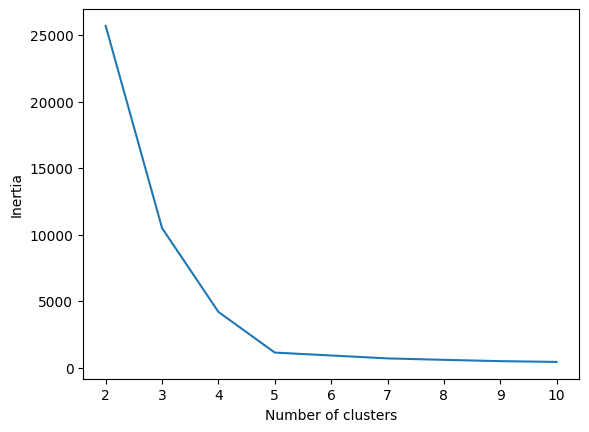

In [ ]:


# Use elbow method to determine optimal number of clusters
n_clusters_range = range(2, 11)
inertia_scores = []
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(df_labeled.drop(columns = 'bbl'))
    inertia_scores.append(kmeans.inertia_)

# Plot the elbow curve
import matplotlib.pyplot as plt
plt.plot(n_clusters_range, inertia_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
df_labeled.head()

,bbl,lotarea,comarea,resarea,officearea,retailarea,numbldgs,numfloors,unitsres,lotfront,lotdepth,yearbuilt,landmark,yearalter1,A,B,C,D,R,S
6,4100870021.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.03,0.66,0.00,0.11,1.00,0.00,0.00,0.00,0.00,0.00
27,4106250002.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.04,0.68,0.00,0.11,1.00,0.00,0.00,0.00,0.00,0.00
34,4020090010.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.00,0.04,0.99,0.00,0.12,0.00,0.00,1.00,0.00,0.00,0.00
40,4102350333.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.04,0.68,0.00,0.11,1.00,0.00,0.00,0.00,0.00,0.00
58,4098470012.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.04,0.78,0.00,0.11,0.00,1.00,0.00,0.00,0.00,0.00


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_labeled.drop(columns = 'bbl'))
df_labeled['cluster_label'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#scale unlabeled data
df_unlabeled = copy[copy['bldg_price'] == 0]
df_unlabeled.shape

(679845, 21)

In [ ]:
df_unlabeled.head()

,bbl,lotarea,comarea,resarea,officearea,retailarea,numbldgs,numfloors,unitsres,lotfront,lotdepth,yearbuilt,landmark,yearalter1,bldg_price,A,B,C,D,R,S
0,2022860024.00,1666.00,0.00,1216.00,0.00,0.00,1.00,2.00,1.00,16.67,100.00,1910.00,0.00,2006.00,0.00,1,0,0,0,0,0
1,2022860103.00,1874.00,0.00,1440.00,0.00,0.00,1.00,2.00,2.00,18.75,100.00,1910.00,0.00,2006.00,0.00,0,1,0,0,0,0
2,1012490146.00,1812.00,0.00,4378.00,0.00,0.00,1.00,4.00,9.00,18.00,100.67,1893.00,0.00,2006.00,0.00,0,0,1,0,0,0
3,1012490149.00,2115.00,0.00,6750.00,0.00,0.00,1.00,4.00,10.00,21.00,100.67,1894.00,0.00,2006.00,0.00,0,0,1,0,0,0
4,4119390131.00,3000.00,0.00,1764.00,0.00,0.00,1.00,2.00,2.00,30.00,100.00,1960.00,0.00,2006.00,0.00,0,1,0,0,0,0


In [ ]:

cols_to_scale = ['lotarea', 'comarea', 'resarea', 'officearea', 'retailarea', 
                 'numbldgs', 'numfloors', 'unitsres', 'lotfront', 'lotdepth', 'yearbuilt',
                 'landmark', 'yearalter1', 'A', 'B', 'C', 'D', 'R', 'S', 'bldg_price']

# Create a new dataframe with the selected columns
df_unlabeled = df_unlabeled[['bldg_price', 'bbl'] + cols_to_scale]

# Initialize the StandardScaler object and fit_transform the selected columns
scaler = MinMaxScaler()
df_unlabeled[cols_to_scale] = scaler.fit_transform(df_unlabeled[cols_to_scale])

In [ ]:
# Use the trained k-means model to predict cluster assignments for the unlabeled data
unlabeled_cluster_assignments = kmeans.predict(df_unlabeled.drop(columns=[ 'bldg_price', 'bbl']))
df_unlabeled['cluster_label'] = unlabeled_cluster_assignments


In [ ]:
df_unlabeled = df_unlabeled.drop(columns = ['bldg_price'])

In [ ]:
df_labeled.head()

,bbl,lotarea,comarea,resarea,officearea,retailarea,numbldgs,numfloors,unitsres,lotfront,lotdepth,yearbuilt,landmark,yearalter1,A,B,C,D,R,S,cluster_label
6,4100870021.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.03,0.66,0.00,0.11,1.00,0.00,0.00,0.00,0.00,0.00,2
27,4106250002.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.04,0.68,0.00,0.11,1.00,0.00,0.00,0.00,0.00,0.00,2
34,4020090010.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.00,0.04,0.99,0.00,0.12,0.00,0.00,1.00,0.00,0.00,0.00,1
40,4102350333.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.04,0.68,0.00,0.11,1.00,0.00,0.00,0.00,0.00,0.00,2
58,4098470012.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.04,0.78,0.00,0.11,0.00,1.00,0.00,0.00,0.00,0.00,0


In [ ]:
cluster_labels = pd.concat([df_labeled , df_unlabeled], axis = 0)


In [ ]:
cluster_labels = cluster_labels[['bbl', 'cluster_label']]
cluster_labels = copy.merge(cluster_labels, right_on = 'bbl', left_on = 'bbl')

In [ ]:
cluster_labels.head()

,bbl,lotarea,comarea,resarea,officearea,retailarea,numbldgs,numfloors,unitsres,lotfront,lotdepth,yearbuilt,landmark,yearalter1,bldg_price,A,B,C,D,R,S,cluster_label
0,2022860024.00,1666.00,0.00,1216.00,0.00,0.00,1.00,2.00,1.00,16.67,100.00,1910.00,0.00,2006.00,0.00,1,0,0,0,0,0,2
1,2022860103.00,1874.00,0.00,1440.00,0.00,0.00,1.00,2.00,2.00,18.75,100.00,1910.00,0.00,2006.00,0.00,0,1,0,0,0,0,0
2,1012490146.00,1812.00,0.00,4378.00,0.00,0.00,1.00,4.00,9.00,18.00,100.67,1893.00,0.00,2006.00,0.00,0,0,1,0,0,0,1
3,1012490149.00,2115.00,0.00,6750.00,0.00,0.00,1.00,4.00,10.00,21.00,100.67,1894.00,0.00,2006.00,0.00,0,0,1,0,0,0,1
4,4119390131.00,3000.00,0.00,1764.00,0.00,0.00,1.00,2.00,2.00,30.00,100.00,1960.00,0.00,2006.00,0.00,0,1,0,0,0,0,0


In [ ]:
#properties of clusters
summary =cluster_labels.groupby(['cluster_label']).agg({'A': 'sum', 'B' :'sum', 'C'  :'sum' ,
       'D':'sum', 'R':'sum',
       'S':'sum', 'lotarea': 'mean', 'comarea': 'mean', 'resarea': 'mean', 'officearea': 'mean', 'retailarea': 'mean', 'numbldgs': 'mean', 'numfloors': 'mean', 'unitsres': 'mean', 'lotfront': 'mean',
       'lotdepth': 'mean', 'yearbuilt': 'mean', 'landmark': 'mean', 'yearalter1': 'mean'}).reset_index()


In [ ]:
summary.head(10)

,cluster_label,A,B,C,D,R,S,lotarea,comarea,resarea,officearea,retailarea,numbldgs,numfloors,unitsres,lotfront,lotdepth,yearbuilt,landmark,yearalter1
0,0,0,250641,0,0,0,0,2935.16,0.18,1987.01,0.01,0.00,1.29,2.12,2.00,29.62,100.00,1940.91,0.00,2006.21
1,1,0,0,134566,0,0,0,3452.43,151.50,5628.53,11.07,126.29,1.26,3.06,7.04,31.43,99.56,1933.19,0.00,2004.50
2,2,311961,0,0,0,0,0,3461.90,0.12,1552.85,0.01,0.00,1.38,2.00,1.01,33.73,99.76,1944.33,0.00,2006.06
3,3,0,0,0,15014,191,0,26404.77,5233.11,89955.08,942.18,1799.96,1.31,8.75,94.08,129.34,138.43,1950.03,0.01,2001.49
4,4,0,0,0,0,9416,33212,4613.13,2305.39,9380.83,344.66,1361.47,1.38,3.50,9.22,33.43,95.21,1935.44,0.00,2005.49


In [ ]:
summary.to_csv('summary.csv')

In [ ]:
inertia = kmeans.inertia_

print(f"Inertia: {inertia}")

Inertia: 1130.4462064622503


# Loading Spatial Data in 

In [ ]:
gdf = gpd.read_file('/content/gdrive/MyDrive/Spatial/PlutoData/MapPLUTO.shp')
gdf.head()

,BBL,geometry
0,1000010101.00,"MULTIPOLYGON (((972409.690 190685.560, 972428...."
1,1000010201.00,"POLYGON ((973648.661 193712.461, 973648.066 19..."
2,1000030001.00,"MULTIPOLYGON (((980152.176 194762.899, 980089...."
3,1000030003.00,"POLYGON ((980713.169 194965.339, 980726.198 19..."
4,1000030004.00,"POLYGON ((980403.205 194731.754, 980401.324 19..."


In [ ]:
gdf.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
centroids = gdf.geometry.centroid

gdf['x_coord'] = centroids.x
gdf['y_coord'] = centroids.y

gdf.head()

,BBL,geometry,x_coord,y_coord
0,1000010101.00,"MULTIPOLYGON (((972409.690 190685.560, 972428....",971670.00,190635.94
1,1000010201.00,"POLYGON ((973648.661 193712.461, 973648.066 19...",972917.35,193838.47
2,1000030001.00,"MULTIPOLYGON (((980152.176 194762.899, 980089....",979893.07,195396.33
3,1000030003.00,"POLYGON ((980713.169 194965.339, 980726.198 19...",980605.51,195017.89
4,1000030004.00,"POLYGON ((980403.205 194731.754, 980401.324 19...",980385.73,194763.52


In [ ]:
gdf['BBL'] = gdf['BBL'].astype(int)

In [ ]:
labeled = cluster_labels[cluster_labels['bldg_price']> 0]
unlabeled = cluster_labels[cluster_labels['bldg_price'] == 0]

In [ ]:
unlabeled = gdf.merge(unlabeled, left_on = 'BBL', right_on = 'bbl', how = 'right')
labeled = gdf.merge(labeled, left_on = 'BBL', right_on = 'bbl', how = 'right')


In [ ]:
labeled = labeled[['x_coord', 'y_coord', 'cluster_label', 'bldg_price']]
unlabeled = unlabeled[['x_coord', 'y_coord', 'cluster_label', 'bldg_price']]

In [ ]:

for val in range(0,5):
    filtered_df = labeled[labeled['cluster_label'] == val]
    filtered_df.drop(columns=['cluster_label'], inplace=True)
    output_filename = f'/content/gdrive/MyDrive/Spatial/datasets/labeled_{val}.csv'
    filtered_df.to_csv(output_filename)

<ipython-input-111-ca695163e1ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns=['cluster_label'], inplace=True)
<ipython-input-111-ca695163e1ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns=['cluster_label'], inplace=True)
<ipython-input-111-ca695163e1ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns=['cluster_label'], inplace=True)
<ipython-input-111-

In [ ]:

for val in range(0,5):
    filtered_df = unlabeled[unlabeled['cluster_label'] == val]
    filtered_df.drop(columns=['cluster_label'], inplace=True)
    output_filename = f'/content/gdrive/MyDrive/Spatial/datasets/unlabeled_{val}.csv'
    filtered_df.to_csv(output_filename)

<ipython-input-112-81ad9c4096f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns=['cluster_label'], inplace=True)
<ipython-input-112-81ad9c4096f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns=['cluster_label'], inplace=True)
<ipython-input-112-81ad9c4096f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns=['cluster_label'], inplace=True)
<ipython-input-112-